20.85
20.85
rate: 44100
lenght (s): 20.85


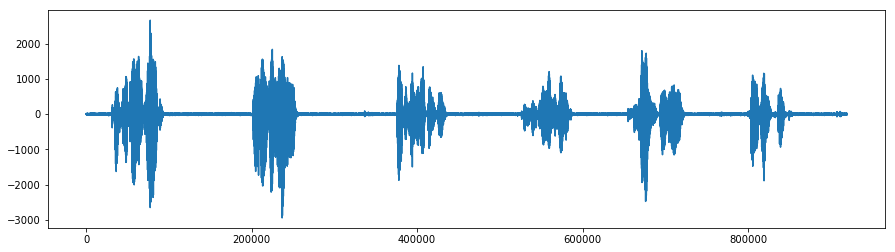

In [5]:
%matplotlib inline
import warnings
## scipy gives a waring when reading wav file
warnings.filterwarnings('ignore')

import scipy as sp
import scipy.io.wavfile
import numpy as np
from matplotlib import pyplot as plt

sample_rate, wav_data = scipy.io.wavfile.read("kombucha.wav")
# sample_rate, wav_data = sp.io.wavfile.read("anything.wav")
# sample_rate, wav_data = sp.io.wavfile.read("relief.wav")
print(wav_data[:,1].shape[0] / sample_rate)
## taking the mean of the two channels
#mono_data = numpy.mean(wav_data, axis=1)
## taking just one channel
mono_data = wav_data[:, 1]
print(mono_data.shape[0] / sample_rate)
audio_data = mono_data

print("rate:", sample_rate)
print("lenght (s):", len(mono_data) / sample_rate)
plt.figure(figsize=(15, 4))
plt.plot(mono_data)
plt.show()

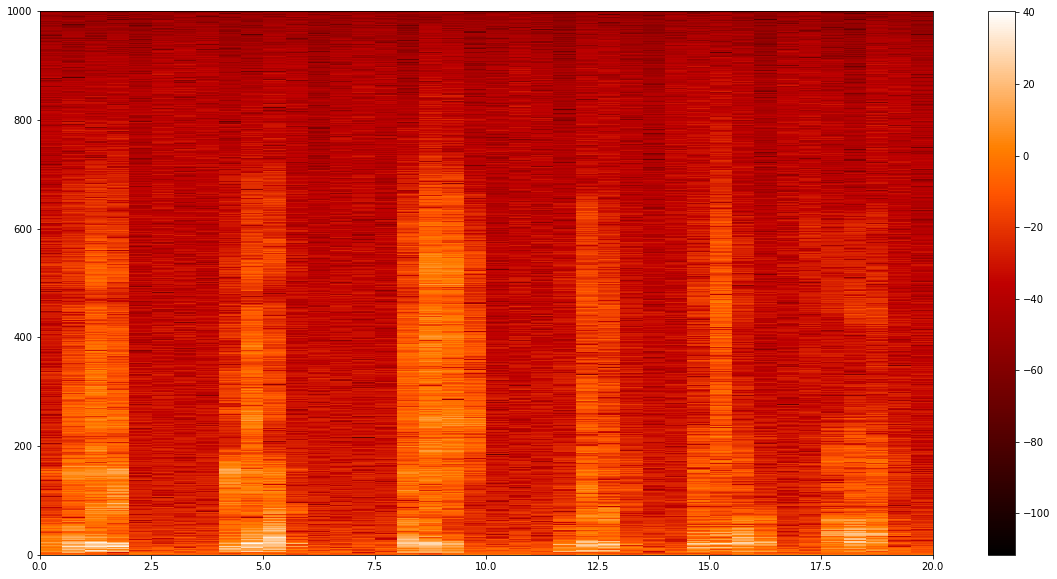

In [68]:
## creating the entire spectrogram

from matplotlib import mlab 

audio_data_ = audio_data
NFFT = sample_rate     # the length of the windowing segments
Fs = sample_rate  # the sampling rate

# plot signal and spectrogram
fig = plt.figure(figsize=(20, 10))
audio_spectra, freqs, bins, im = plt.specgram(audio_data_, NFFT=NFFT,   Fs=Fs,noverlap=int(sample_rate/2), 
                                    cmap=plt.cm.gist_heat, scale='dB', mode="psd")
# audio_spectra_lin, freqs, bins, im = plt.specgram(audio_data_, NFFT=NFFT,   Fs=Fs,noverlap=int(sample_rate/2), 
#                                     cmap=plt.cm.gist_heat, scale='linear', mode="psd")
# print(audio_spectra == audio_spectra_lin)

## oH! this does not change the image at all
im.set_extent([0,bins[-1],0,1000])
plt.colorbar(orientation='vertical')
plt.show()

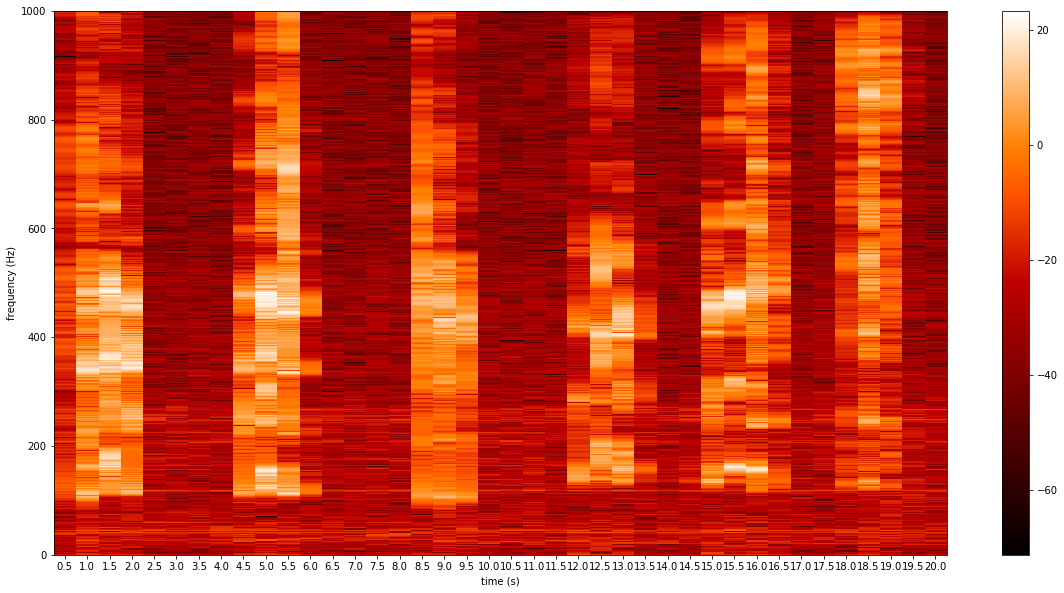

In [66]:
###
## Plotting data that has been filtered to below 1000Hz (human audible)
###

# h for human
h_audio_sptr = audio_spectra[0:1000, :]
# h_audio_sptr = audio_spectra
audio_mean = np.mean(h_audio_sptr)
# converting to dB
h_audio_sptr = 10 * np.log10(h_audio_sptr / audio_mean)


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.imshow(h_audio_sptr, cmap=plt.cm.gist_heat)
ax.set_aspect('auto')
ax.set_ylim(ax.get_ylim()[::-1]) ## reversing axis

## making pretty
plt.xlabel("time (s)")
plt.ylabel("frequency (Hz)")
plt.xticks(np.arange(h_audio_sptr.shape[1]), bins)
plt.colorbar(orientation='vertical')
plt.show()

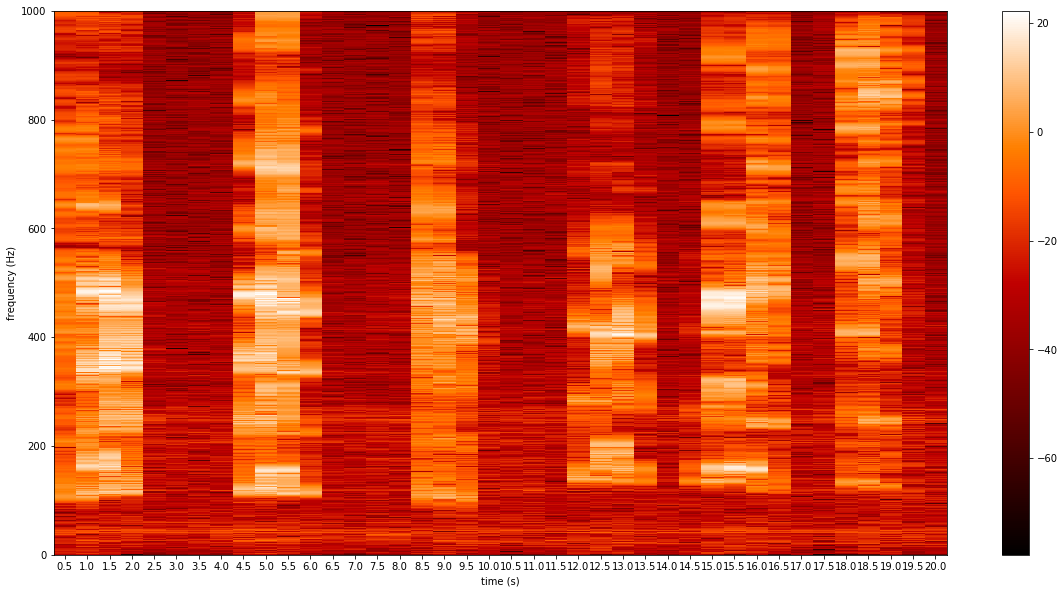

In [75]:
from scipy import signal
##
# so there seems to be no agreement between the plot by matplotlib, and the next plot from the data that is returned
# trying scipy
##

f, t, sxx = signal.spectrogram(audio_data_, nperseg=sample_rate, fs=sample_rate,
                                  noverlap=int(sample_rate/2), mode="psd")

## to dB
sxx = sxx[0:1000, :]
sxx_mean = np.mean(sxx)
db_sxx = 10 * np.log10(sxx / sxx_mean)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.imshow(db_sxx, cmap=plt.cm.gist_heat)
ax.set_aspect('auto')
ax.set_ylim(ax.get_ylim()[::-1]) ## reversing axis

## making pretty
plt.xlabel("time (s)")
plt.ylabel("frequency (Hz)")
plt.xticks(np.arange(h_audio_sptr.shape[1]), bins)
plt.colorbar(orientation='vertical')
plt.show()
